<a href="https://colab.research.google.com/github/IvanIndargo/Datamining_exersice/blob/main/Ivan_Indargo_0706022210064_Week6_PIMA_Indians_Diabetes_Database.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

IVAN INDARGO - 0706022210064

In [73]:
# Mengimport library yang digunakan
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn import tree
from sklearn.naive_bayes import GaussianNB

In [74]:
url = 'https://raw.githubusercontent.com/IvanIndargo/dataset-DM/refs/heads/main/diabetes.csv'
df = pd.read_csv(url) #mengimport dataset

df.sample(10) #menampilkan sepuluh data random dari dataset untuk pengecekan data

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
382,1,109,60,8,182,25.4,0.947,21,0
317,3,182,74,0,0,30.5,0.345,29,1
97,1,71,48,18,76,20.4,0.323,22,0
608,0,152,82,39,272,41.5,0.270,27,0
203,2,99,70,16,44,20.4,0.235,27,0
64,7,114,66,0,0,32.8,0.258,42,1
209,7,184,84,33,0,35.5,0.355,41,1
575,1,119,44,47,63,35.5,0.280,25,0
146,9,57,80,37,0,32.8,0.096,41,0
434,1,90,68,8,0,24.5,1.138,36,0


In [75]:
df.info() #menampilkan info dari kolom dataset untuk menunjukkan jumlah data, jumlah kolom, nama kolom, mengecek kekosongan data, dan tipe data untuk memudahkan analisa

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [76]:
df.describe() # menunjukkan deskripi kolom dari masing masing dataset, seperti rata-rata, nilai minimum, nilai maksimum, nilai tengah, dan lainnya untuk membantu dalam analisa

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


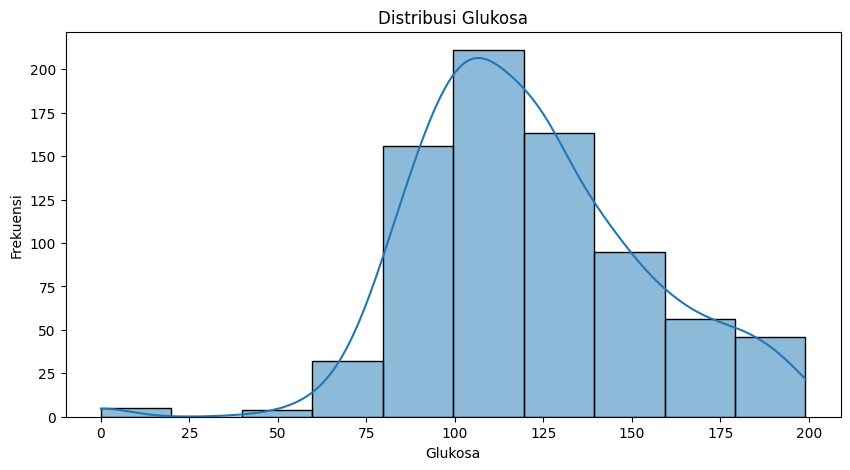

In [77]:
plt.figure(figsize=(10, 5))
sns.histplot(df['Glucose'], bins=10, kde=True)
plt.title('Distribusi Glukosa')
plt.xlabel('Glukosa')
plt.ylabel('Frekuensi')
plt.show()
#membuat grafik bar untuk menunjukkan perbandingan glukosa dan frekuensi

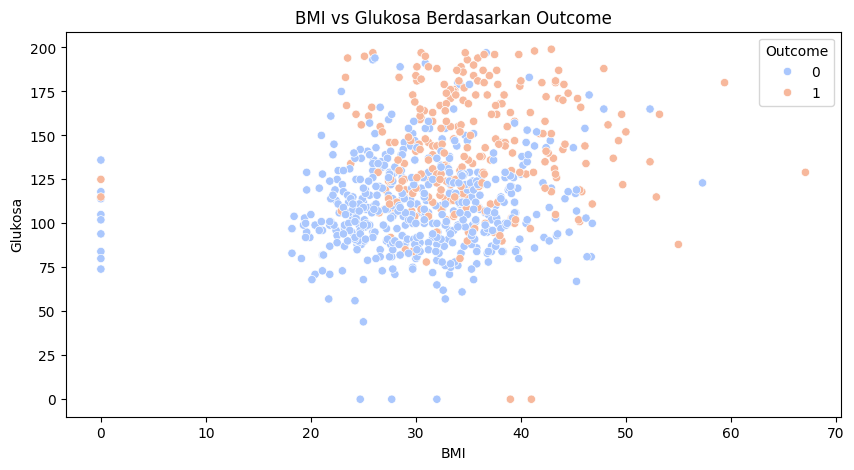

In [78]:
plt.figure(figsize=(10, 5))
sns.scatterplot(data=df, x='BMI', y='Glucose', hue='Outcome', palette='coolwarm')
plt.title('BMI vs Glukosa Berdasarkan Outcome')
plt.xlabel('BMI')
plt.ylabel('Glukosa')
plt.legend(title='Outcome')
plt.show()
#menunjukkan grafik scatter plot untuk menunjukkan hubungan antara bmi dan glukosa

<ipython-input-79-cc5bd456442b>:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')


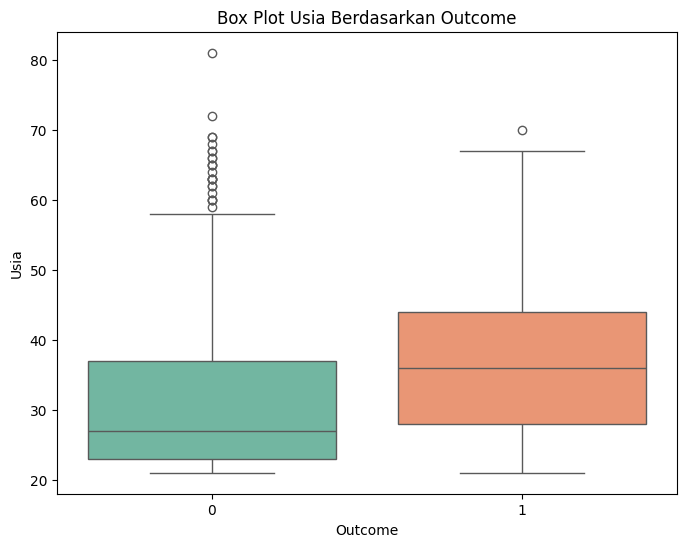

In [79]:
plt.figure(figsize=(8, 6))
sns.boxplot(data=df, x='Outcome', y='Age', palette='Set2')
plt.title('Box Plot Usia Berdasarkan Outcome')
plt.xlabel('Outcome')
plt.ylabel('Usia')
plt.show()
#menunjukkan grafik untuk menunjukkan distribusi outcome dan usia

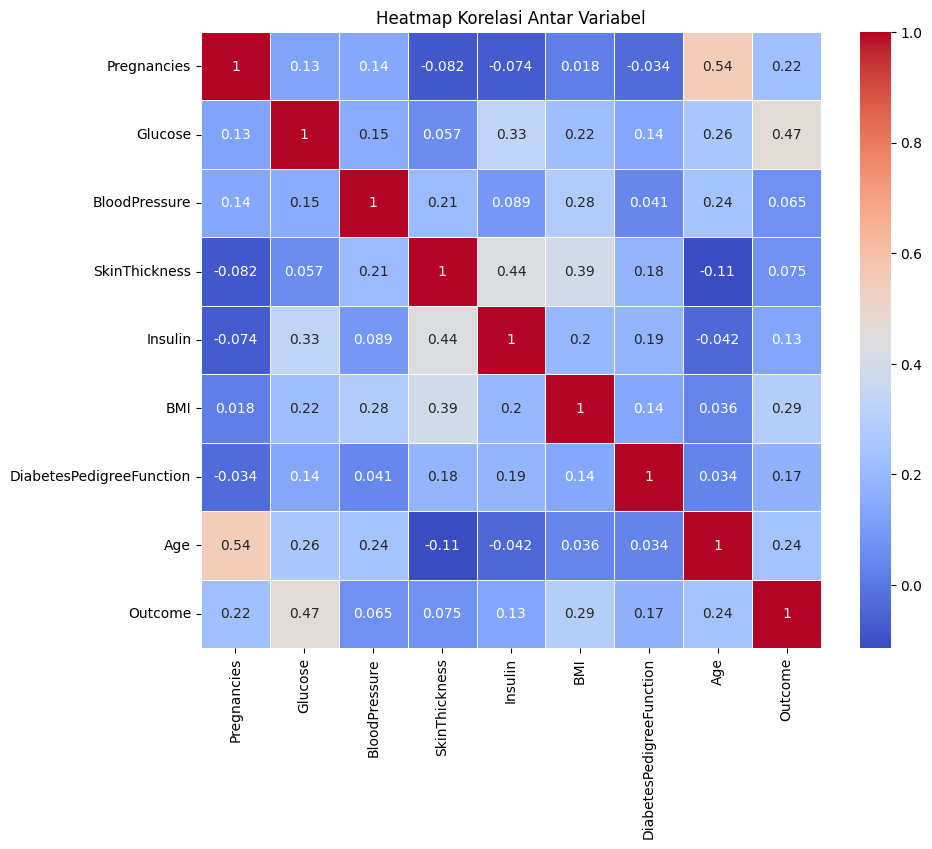

In [80]:
correlation_matrix = df.corr()

plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', linewidths=0.5)
plt.title('Heatmap Korelasi Antar Variabel')
plt.show()
#memberikan perbandingan korelasi antara kolom kolom yang terdapat di dalam dataset

In [81]:
X = df.drop(['Outcome'], axis=1)
y = df['Outcome']
#membuat variabel untuk menyimpan kolom independet dan kolom dependent untuk memudahkan dalam analisa
#variabel y digunakan untuk menyimpan value dari outcome, sedangkan variabel x digunakan untuk menyimpan value kolom selain outcome

In [82]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.20, random_state=42)
#untuk memisahkan data menjadi dua bagian, sebagian data dijadikan data training dan sebagian lainnya digunakan untuk data test
#besar pembagian data nya dapat dirubah dan dibuat dengan mengganti test size
#di sini besar data test 20 persen dan data training sebanyak 80 persen

In [83]:
X_train.shape, X_test.shape
#untuk menunjukkan jumlah kolom dan baris

((614, 8), (154, 8))

In [84]:
dt_en = DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

dt_en.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan desicion tree dengan menggunakan kriteria entropi

DecisionTreeClassifier(criterion='entropy', max_depth=3, random_state=0)

In [85]:
y_pred_en = dt_en.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [86]:
print('Model accuracy score with criterion entropy: {0:0.4f}'.format(accuracy_score(y_test, y_pred_en)))
#menampilkan tingkat atau score keakurasian

Model accuracy score with criterion entropy: 0.7662


In [87]:
y_train_pred = dt_en.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = dt_en.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
# membuat pelatihan model dan prediksi serta melihat keakurasian pemodelan apakan model ini overfitting, underfitting, atau model tersebut sudah balance

Training accuracy: 0.7752
Test accuracy: 0.7662
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\nentropy = 0.931\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\nentropy = 0.712\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\nentropy = 0.391\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'entropy = 0.068\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'entropy = 0.646\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\nentropy = 0.933\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'entropy = 0.191\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'entropy = 0.986\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\nentropy = 0.964\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 145.5\nentropy = 0.895\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'entropy = 0.533\nsamples = 33\nvalue = [29, 4]'),
 Text(0.6875, 0.125, 'entropy = 0.996\nsamples

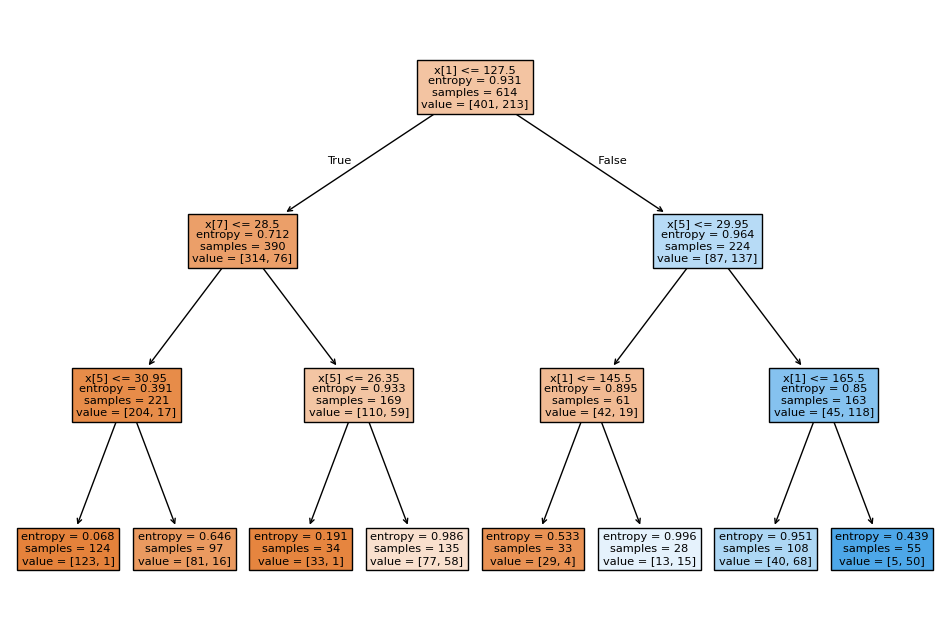

In [88]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_en.fit(X_train, y_train), filled=True)
#memvisualisasikan decision tree dengan kriteria entropi

In [89]:
dt_gini = DecisionTreeClassifier(criterion='gini', max_depth=3, random_state=0)

dt_gini.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan desicion tree dengan menggunakan kriteria gini

DecisionTreeClassifier(max_depth=3, random_state=0)

In [90]:
y_pred_gini = dt_gini.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [91]:
print('Model accuracy score with criterion gini: {0:0.4f}'.format(accuracy_score(y_test, y_pred_gini)))
#menampilkan tingkat atau score keakurasian

Model accuracy score with criterion gini: 0.7597


In [92]:
y_train_pred = dt_gini.predict(X_train)
train_accuracy = accuracy_score(y_train, y_train_pred)
y_test_pred = dt_gini.predict(X_test)
test_accuracy = accuracy_score(y_test, y_test_pred)
print(f"Training accuracy: {train_accuracy:.4f}")
print(f"Test accuracy: {test_accuracy:.4f}")
if train_accuracy > test_accuracy:
    print("The model might be overfitting.")
elif train_accuracy == test_accuracy:
    print("The model is likely to be well-balanced.")
else:
    print("The model might be underfitting.")
# membuat pelatihan model dan prediksi serta melihat keakurasian pemodelan apakan model ini overfitting, underfitting, atau model tersebut sudah balance

Training accuracy: 0.7769
Test accuracy: 0.7597
The model might be overfitting.


[Text(0.5, 0.875, 'x[1] <= 127.5\ngini = 0.453\nsamples = 614\nvalue = [401, 213]'),
 Text(0.25, 0.625, 'x[7] <= 28.5\ngini = 0.314\nsamples = 390\nvalue = [314, 76]'),
 Text(0.375, 0.75, 'True  '),
 Text(0.125, 0.375, 'x[5] <= 30.95\ngini = 0.142\nsamples = 221\nvalue = [204, 17]'),
 Text(0.0625, 0.125, 'gini = 0.016\nsamples = 124\nvalue = [123, 1]'),
 Text(0.1875, 0.125, 'gini = 0.275\nsamples = 97\nvalue = [81, 16]'),
 Text(0.375, 0.375, 'x[5] <= 26.35\ngini = 0.454\nsamples = 169\nvalue = [110, 59]'),
 Text(0.3125, 0.125, 'gini = 0.057\nsamples = 34\nvalue = [33, 1]'),
 Text(0.4375, 0.125, 'gini = 0.49\nsamples = 135\nvalue = [77, 58]'),
 Text(0.75, 0.625, 'x[5] <= 29.95\ngini = 0.475\nsamples = 224\nvalue = [87, 137]'),
 Text(0.625, 0.75, '  False'),
 Text(0.625, 0.375, 'x[1] <= 146.5\ngini = 0.429\nsamples = 61\nvalue = [42, 19]'),
 Text(0.5625, 0.125, 'gini = 0.239\nsamples = 36\nvalue = [31, 5]'),
 Text(0.6875, 0.125, 'gini = 0.493\nsamples = 25\nvalue = [11.0, 14.0]'),
 Text(

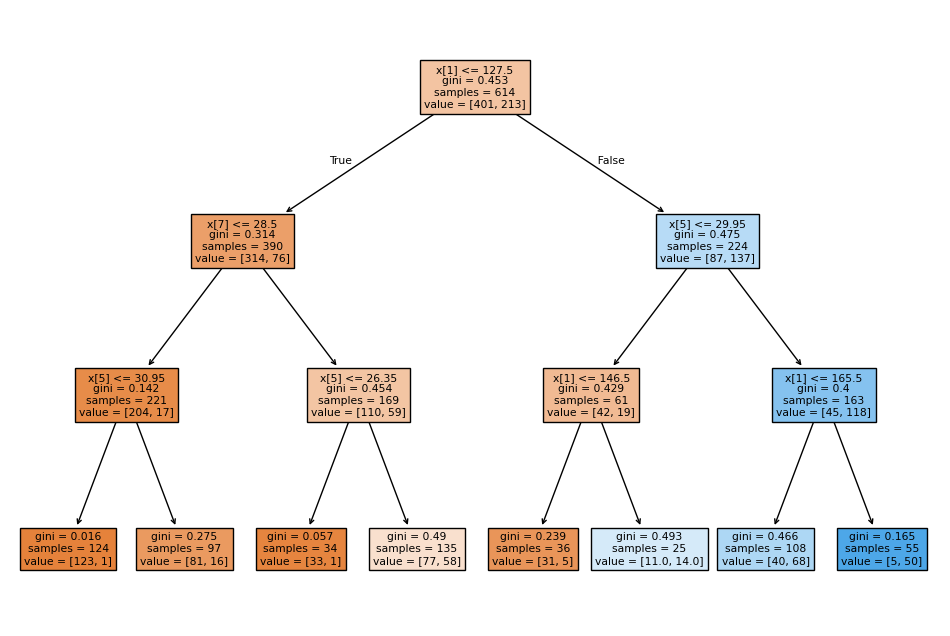

In [93]:
plt.figure(figsize=(12, 8))
tree.plot_tree(dt_gini.fit(X_train, y_train), filled=True)
#memvisualisasikan decision tree dengan kriteria gini

In [94]:
from sklearn.metrics import confusion_matrix
cm = confusion_matrix(y_test, y_pred_en)
print("Confusion Matrix for Entropy-based Tree:\n", cm)
cm = confusion_matrix(y_test, y_pred_gini)
print("Confusion Matrix for Gini-based Tree:\n", cm)
#pembuatan confusion matrix berdasarkan decision tree entropi dan gini

Confusion Matrix for Entropy-based Tree:
 [[83 16]
 [20 35]]
Confusion Matrix for Gini-based Tree:
 [[83 16]
 [21 34]]


In [95]:
print(classification_report(y_test, y_pred_en))
print(classification_report(y_test, y_pred_gini))
#untuk menampilkan laporan pengklasifikasian dari entropi dan gini
#dilihat dari hasil laporannya keduanya memiliki tingkat akurasi yang hampir sama di angka 0.76 dan 0.77 dan nilai dari recall, precision, f1-score yang hanya memiliki sedikit perbedaan
#hal ini dapat menunjukkan bahwa kedua pemodelan tersebut hampir sama akuratnya tetapi kita dapat menentukan dan mengambil pemodelan yang memiliki performa lebih baik

              precision    recall  f1-score   support

           0       0.81      0.84      0.82        99
           1       0.69      0.64      0.66        55

    accuracy                           0.77       154
   macro avg       0.75      0.74      0.74       154
weighted avg       0.76      0.77      0.76       154

              precision    recall  f1-score   support

           0       0.80      0.84      0.82        99
           1       0.68      0.62      0.65        55

    accuracy                           0.76       154
   macro avg       0.74      0.73      0.73       154
weighted avg       0.76      0.76      0.76       154



In [96]:
from sklearn.linear_model import LogisticRegression
classifier = LogisticRegression(max_iter=200)
classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan menggunakan logistic regression

LogisticRegression(max_iter=200)

In [97]:
y_pred_log = classifier.predict(X_test)
comparison_table = pd.DataFrame({"y_test": y_test, "y_pred": y_pred_log})
print(comparison_table.head())
#membuat pelatihan untuk memprediksi data x_test dan membuat tabel komparasi untuk menunjukkan tabel aktual dan tabel prediksi

     y_test  y_pred
668       0       0
324       0       0
624       0       0
690       0       0
473       0       0


In [98]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, y_pred_log)))
#menunjukkan tingkat atau score keakurasiannya

Accuracy Score: 0.7468


In [99]:
cmatrix = confusion_matrix(y_test, y_pred_log)
print("Confusion Matrix:\n", cmatrix)
#pembuatan confusion matriks

Confusion Matrix:
 [[78 21]
 [18 37]]


In [100]:
print(classification_report(y_test, y_pred_log))
#menampilkan laporan dari nilai akurasi, precision, recall, f1-score, dan lainnya

              precision    recall  f1-score   support

           0       0.81      0.79      0.80        99
           1       0.64      0.67      0.65        55

    accuracy                           0.75       154
   macro avg       0.73      0.73      0.73       154
weighted avg       0.75      0.75      0.75       154



In [101]:
nb_classifier = GaussianNB()
nb_classifier.fit(X_train, y_train)
#pembuatan dan pelatihan pemodelan menggunakan Gaussian Naive Bayes

GaussianNB()

In [102]:
nb_y_pred = nb_classifier.predict(X_test)
#membuat variabel untuk pemrediksian data x_test

In [103]:
cm = confusion_matrix(y_test, nb_y_pred)
print("Confusion Matrix for Naive Bayes:\n", cm)
#pembuatan confussion matriks

Confusion Matrix for Naive Bayes:
 [[79 20]
 [16 39]]


In [104]:
print('Accuracy Score: {0:0.4f}'.format(accuracy_score(y_test, nb_y_pred)))
#menunjukkan tingkat atau score keakurasiannya

Accuracy Score: 0.7662


In [105]:
print(classification_report(y_test, nb_y_pred))
#menampilkan laporan dari nilai akurasi, precision, recall, f1-score, dan lainnya

              precision    recall  f1-score   support

           0       0.83      0.80      0.81        99
           1       0.66      0.71      0.68        55

    accuracy                           0.77       154
   macro avg       0.75      0.75      0.75       154
weighted avg       0.77      0.77      0.77       154

